In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import xesmf as xe
import xclim.sdba as sdba

In [2]:
ds_tmax = xr.open_dataset("obs_hotdays.nc")
ds_tmax['lon'] = ds_tmax['lon'] - 360

In [3]:
# print(ds_tmax['lon']-360)
# print(ds_tmax['lat'])
# print(ds_tmax['scen'])
print(ds_tmax)

<xarray.Dataset> Size: 20kB
Dimensions:  (lat: 40, lon: 60)
Coordinates:
  * lat      (lat) float64 320B 43.5 43.51 43.52 43.53 ... 43.87 43.88 43.89
  * lon      (lon) float64 480B -79.7 -79.69 -79.68 ... -79.13 -79.12 -79.11
Data variables:
    tmax     (lat, lon) float64 19kB ...


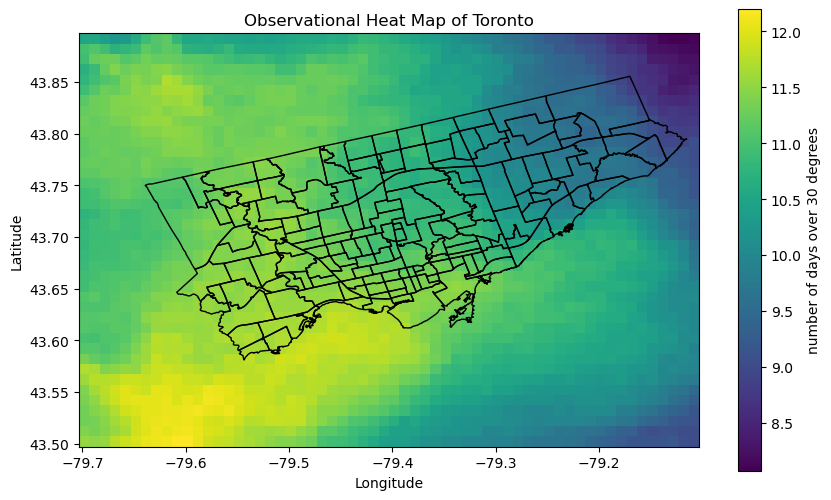

In [4]:
toronto_map = gpd.read_file('toronto_neighbourhood_shape.shp', crs="epsg:4326")

fig, ax = plt.subplots(figsize=(10, 6))
ds_tmax.tmax.plot(x = 'lon', y = 'lat', cbar_kwargs = {'label' : 'number of days over 30 degrees'})
toronto = toronto_map.plot(ax=ax, edgecolor='black', facecolor='none')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Observational Heat Map of Toronto')
plt.savefig('observational-map.pdf')
plt.show()